# **Gradient Boosting**

Ensemble 학습방법 중 하나
여러개의 Weak learner를 결합해서, 점차 강한 예측 모델을 만드는 기법으로, 보통 Decision Tree를 Weak learner로 사용
즉, Gradient( 또는 잔차 = Residual)를 이용해서 이전 모델의 약점을 보완하면서 순차적으로 선형 결합하는 지도 학습 알고리즘 -> 경사하강법(Gradient Descent)

### Gradient Boosting의 특징
* 회귀 및 분류 문제를 해결하는 데 사용되는 강력한 기계 학습 기법

* 기능 공간에서의 부스팅을 기반으로 하는 기계 학습 기술로, 기존 부스팅에 사용되는 일반적인 잔차가 아닌 유사 잔차를 사용한다
    * 일반잔차: 실제 값과 예측 값의 차이.
    * 유사잔차: 손실 함수의 음의 그래디언트로, 현재 모델의 예측값을 개선하기 위해 사용.
    
* 경사 하강법: 손실 함수의 미분을 통해 반복적으로 최솟값으로 이동하는 최적화 알고리즘입니다.

Jerome H. Friedman
[논문 링크]
https://www.jstor.org/stable/2699986

대표적으로 GradientBoostingClassifier와 GradientBoostingRegressor, XGBoost, LightGBM, CatBoost 등

* 장점
    * 잔차를 계속해서 줄여나가기 때문에 정확도가 높다
    * 기본 학습기에 제한되지 않아, 의사결정나무 이외에 다른 모형을 사용할 수 있어 유연하다.

* 단점
    * 과적합이 발생할 가능성이 매우 크다.
    * 계산이 오래걸린다

### Gradient Boosting 알고리즘

초기 모형의 예측결과를 바탕으로, 실제값와 예측값에 대한 잔차를 다시 학습하여 잔차를 줄이는 최적의 모델을 찾은 후,
기존 모델과 결합한다.
해당 과정을 반복해서 모델의 정확도를 높인다.


### Gradient Boosting 과정
1. 모델 초기화: 초기 예측값으로 시작합니다. 회귀 문제의 경우 보통 평균값을 사용합니다.
2. 잔차 계산: 실제 값과 현재 모델의 예측 값 사이의 차이(잔차)를 계산합니다.
3. 새 모델 학습: 잔차를 예측하기 위해 새로운 약한 학습기를 학습시킵니다.
4. 모델 업데이트: 새로운 모델의 예측을 기존 모델에 일정 학습률로 더해 예측을 업데이트합니다.
5. 반복: 잔차 계산, 새로운 모델 학습, 예측 업데이트 과정을 정지 조건(예: 최대 반복 횟수 또는 수렴)까지 반복합니다.

**초기모형은 상수로 설정하여 찾는다**

<math xmlns="http://www.w3.org/1998/Math/MathML" display="block">
  <msub>
    <mi>F</mi>
    <mn>0</mn>
  </msub>
  <mo stretchy="false">(</mo>
  <mi>x</mi>
  <mo stretchy="false">)</mo>
  <mo>=</mo>
  <munder>
    <mrow class="MJX-TeXAtom-OP">
      <mi mathvariant="normal">a</mi>
      <mi mathvariant="normal">r</mi>
      <mi mathvariant="normal">g</mi>
      <mspace width="thinmathspace" />
      <mi mathvariant="normal">m</mi>
      <mi mathvariant="normal">i</mi>
      <mi mathvariant="normal">n</mi>
    </mrow>
    <mrow class="MJX-TeXAtom-ORD">
      <mi>&#x03B3;<!-- γ --></mi>
    </mrow>
  </munder>
  <mo>&#x2061;<!-- ⁡ --></mo>
  <munderover>
    <mo>&#x2211;<!-- ∑ --></mo>
    <mrow class="MJX-TeXAtom-ORD">
      <mi>i</mi>
      <mo>=</mo>
      <mn>1</mn>
    </mrow>
    <mi>n</mi>
  </munderover>
  <mi>L</mi>
  <mo stretchy="false">(</mo>
  <msub>
    <mi>y</mi>
    <mi>i</mi>
  </msub>
  <mo>,</mo>
  <mi>&#x03B3;<!-- γ --></mi>
  <mo stretchy="false">)</mo>
</math>

**유사 잔차를 계산하여, 모형을 업데이트 한다**

g = 의사결정나무
<math xmlns="http://www.w3.org/1998/Math/MathML" display="block">
  <msub>
    <mi>r</mi>
    <mrow class="MJX-TeXAtom-ORD">
      <mi>i</mi>
      <mi>m</mi>
    </mrow>
  </msub>
  <mo>=</mo>
  <mo>&#x2212;<!-- − --></mo>
  <msub>
    <mrow>
      <mo>[</mo>
      <mfrac>
        <mrow>
          <mi mathvariant="normal">&#x2202;<!-- ∂ --></mi>
          <mi>L</mi>
          <mo stretchy="false">(</mo>
          <msub>
            <mi>y</mi>
            <mi>i</mi>
          </msub>
          <mo>,</mo>
          <mi>F</mi>
          <mo stretchy="false">(</mo>
          <msub>
            <mi>x</mi>
            <mi>i</mi>
          </msub>
          <mo stretchy="false">)</mo>
          <mo stretchy="false">)</mo>
        </mrow>
        <mrow>
          <mi mathvariant="normal">&#x2202;<!-- ∂ --></mi>
          <mi>F</mi>
          <mo stretchy="false">(</mo>
          <msub>
            <mi>x</mi>
            <mi>i</mi>
          </msub>
          <mo stretchy="false">)</mo>
        </mrow>
      </mfrac>
      <mo>]</mo>
    </mrow>
    <mrow class="MJX-TeXAtom-ORD">
      <mi>F</mi>
      <mo stretchy="false">(</mo>
      <mi>x</mi>
      <mo stretchy="false">)</mo>
      <mo>=</mo>
      <msub>
        <mi>F</mi>
        <mrow class="MJX-TeXAtom-ORD">
          <mi>m</mi>
          <mo>&#x2212;<!-- − --></mo>
          <mn>1</mn>
        </mrow>
      </msub>
      <mo stretchy="false">(</mo>
      <mi>x</mi>
      <mo stretchy="false">)</mo>
    </mrow>
  </msub>
  <mspace width="thickmathspace" />
  <mspace width="thickmathspace" />
  <mtext>for</mtext>
  <mspace width="thickmathspace" />
  <mspace width="thickmathspace" />
  <mi>i</mi>
  <mo>=</mo>
  <mn>1</mn>
  <mo>,</mo>
  <mo>&#x2026;<!-- … --></mo>
  <mo>,</mo>
  <mi>n</mi>
</math>

<math xmlns="http://www.w3.org/1998/Math/MathML" display="block">
  <msub>
    <mi>F</mi>
    <mi>m</mi>
  </msub>
  <mo stretchy="false">(</mo>
  <mi>x</mi>
  <mo stretchy="false">)</mo>
  <mo>=</mo>
  <msub>
    <mi>F</mi>
    <mrow class="MJX-TeXAtom-ORD">
      <mi>m</mi>
      <mo>&#x2212;<!-- − --></mo>
      <mn>1</mn>
    </mrow>
  </msub>
  <mo stretchy="false">(</mo>
  <mi>x</mi>
  <mo stretchy="false">)</mo>
  <mo>+</mo>
  <mi>l</mi>
  <mo>&#x22C5;<!-- ⋅ --></mo>
  <msub>
    <mi>&#x03B3;<!-- γ --></mi>
    <mi>m</mi>
  </msub>
  <mo>&#x22C5;<!-- ⋅ --></mo>
  <msub>
    <mi>g</mi>
    <mi>m</mi>
  </msub>
  <mo stretchy="false">(</mo>
  <mi>x</mi>
  <mo stretchy="false">)</mo>
</math>

**최종 모형**
<math xmlns="http://www.w3.org/1998/Math/MathML" display="block">
  <msub>
    <mi>F</mi>
    <mi>M</mi>
  </msub>
  <mo stretchy="false">(</mo>
  <mi>x</mi>
  <mo stretchy="false">)</mo>
</math>

* n_estimators:
  * 학습에 사용되는 약한 학습기의 개수.
  *  값을 크게 하면 더 많은 학습기가 사용되지만, 과적합(overfitting)의 위험이 있음.
  *  값을 작게 하면 학습이 충분하지 않아 성능이 떨어질 수 있음.

* learning_rate:
  * 각 약한 학습기가 기여하는 정도를 조절.
  * 값을 작게 하면 모델이 천천히 학습하므로 더 많은 학습기가 필요하지만, 더 정밀하게 최적화됨.
  * 값을 크게 하면 빠르게 학습하지만, 최적의 해에 도달하지 못하고 발산할 수 있음.

* max_depth:
  * 각 결정 트리의 최대 깊이.
  * 값을 크게 하면 더 복잡한 모델이 되어 과적합될 수 있음.
  * 값을 작게 하면 모델이 충분히 복잡하지 않아 학습이 부족할 수 있음.

* subsample:
  * 각 학습 단계에서 사용되는 데이터의 비율.
  * 값을 1보다 작게 하면 일부 데이터만 사용하여 학습하므로 과적합을 방지할 수 있음.
  * 값을 너무 작게 하면 학습이 불안정할 수 있음

* min_samples_split:
  * 내부 노드를 분할하기 위한 최소 샘플 수.
  * 값을 크게 하면 노드 분할이 덜 이루어져 모델이 단순해지고, 값을 작게 하면 분할이 자주 이루어져 모델이 복잡해짐.

* min_samples_leaf:
  * 리프 노드에 있어야 하는 최소 샘플 수.
  * 값을 크게 하면 리프 노드가 커져서 모델이 단순해지고, 값을 작게 하면 리프 노드가 작아져 모델이 복잡해짐.

### target > weight

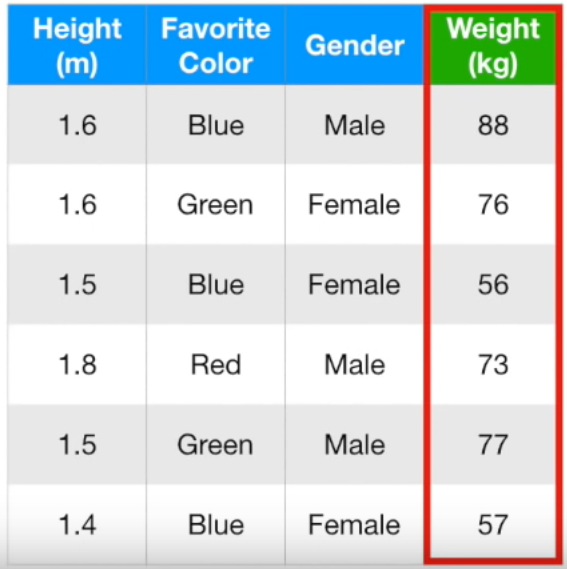

### 초기 예측값과 residual 구함

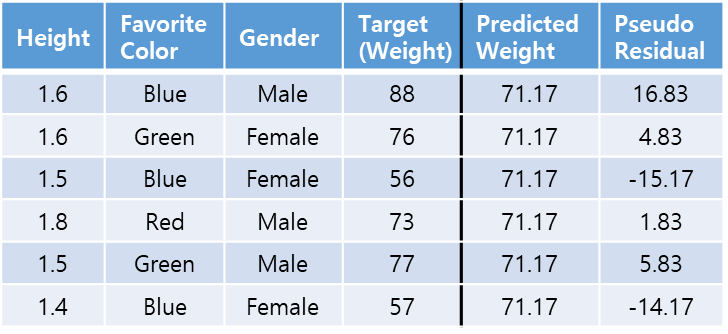
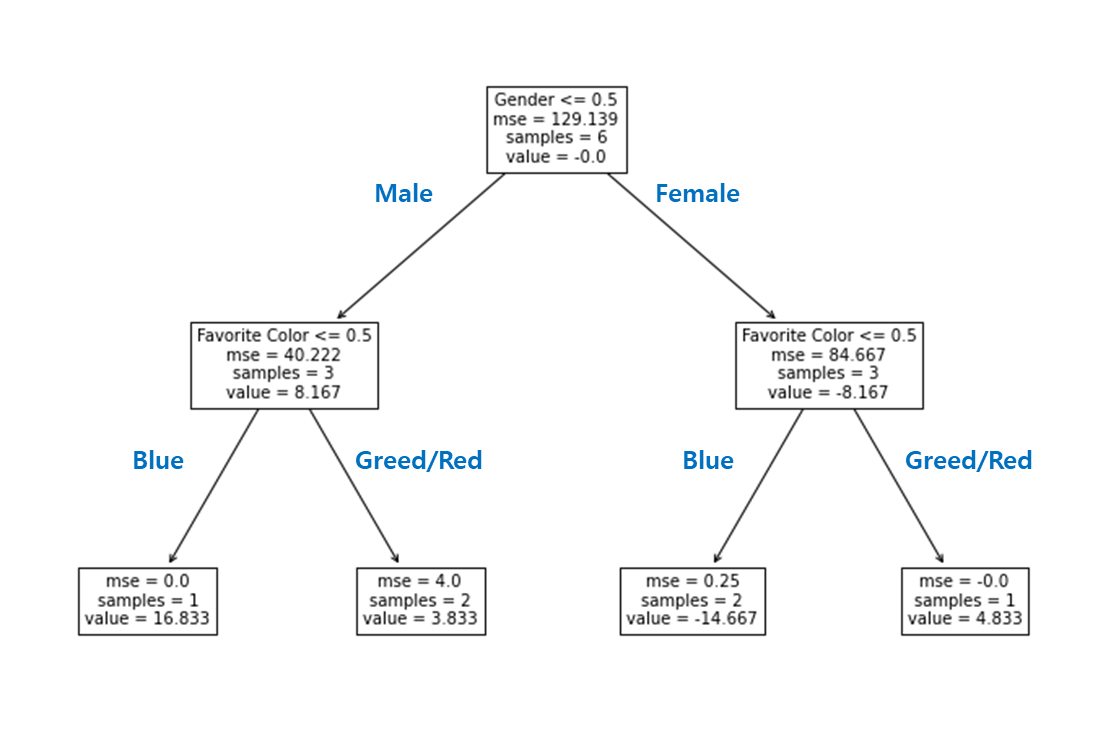

## 2번째 Tree
새로 learning rate를 곱하여, 새로운 weight 예측값 및 그에 대한 residual를 구해서 업데이트 >> 반복


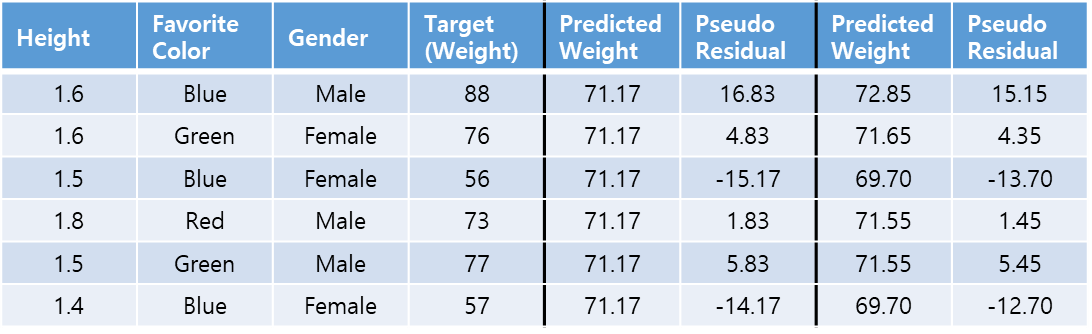
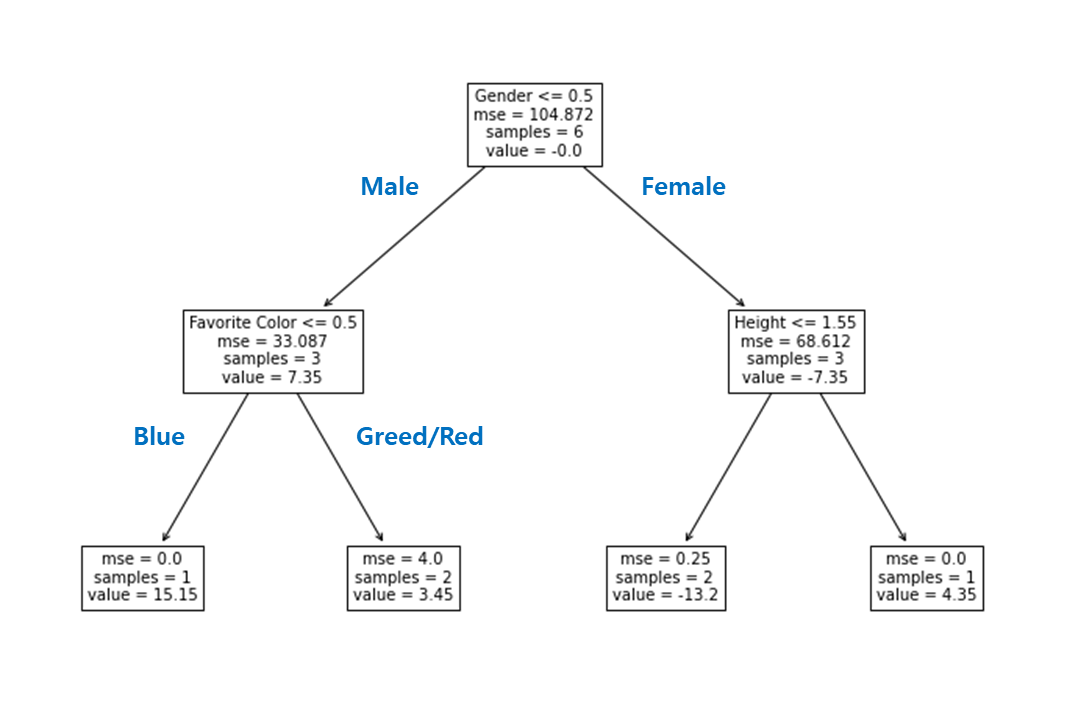